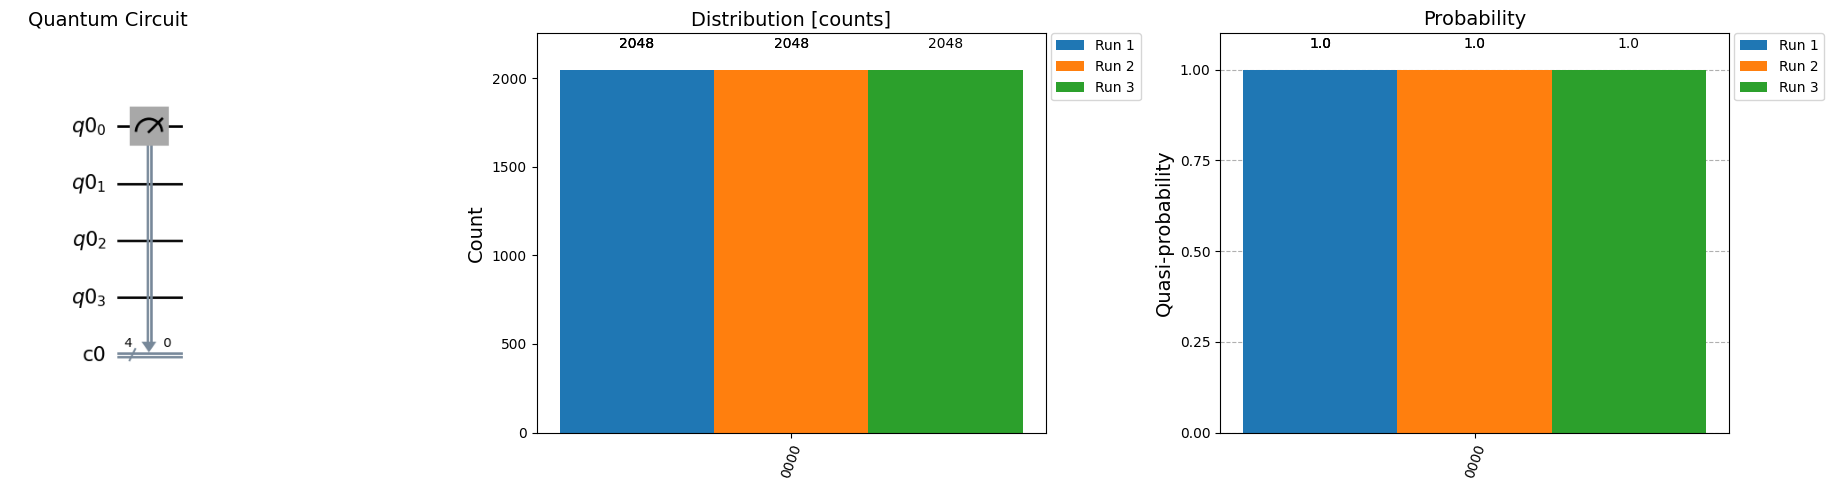

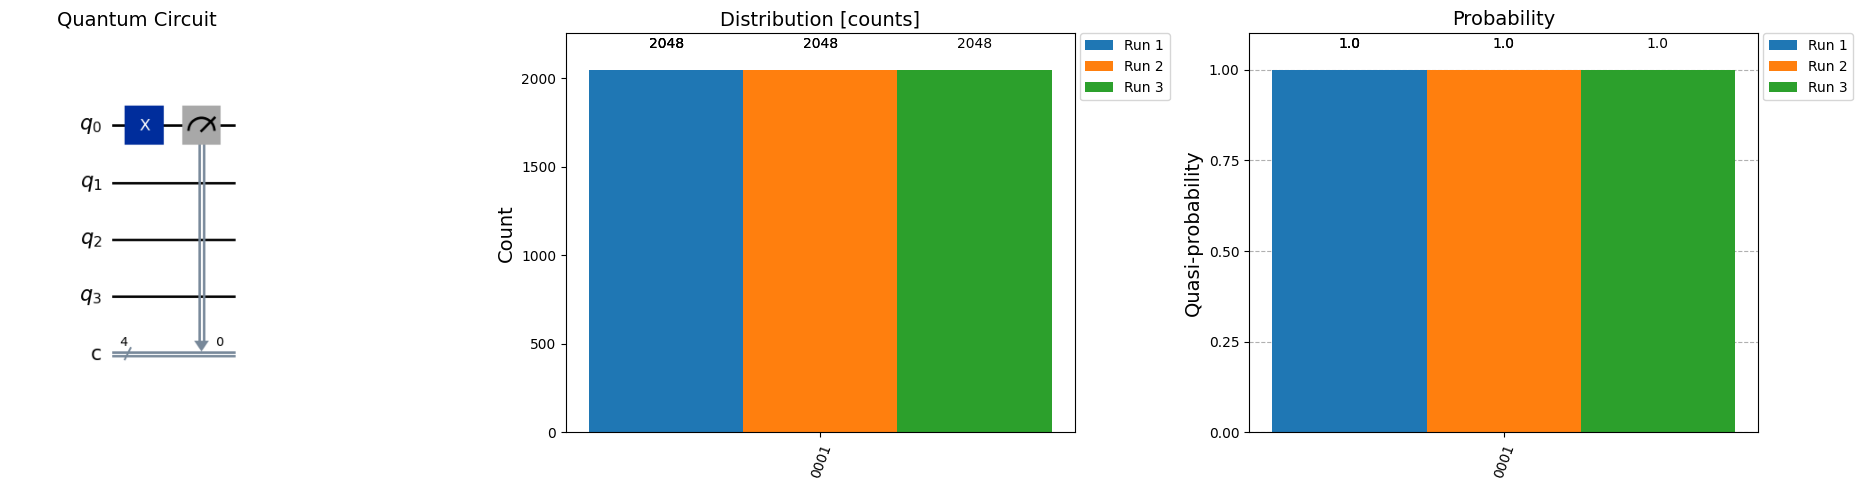

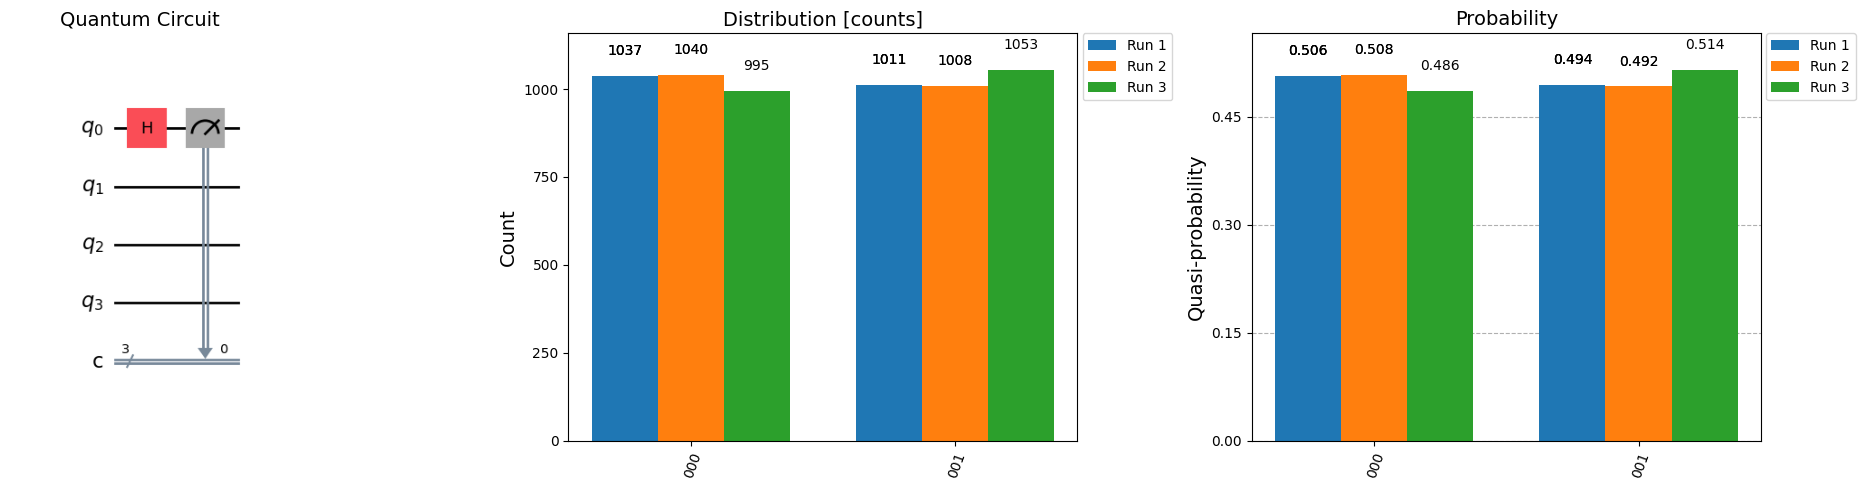

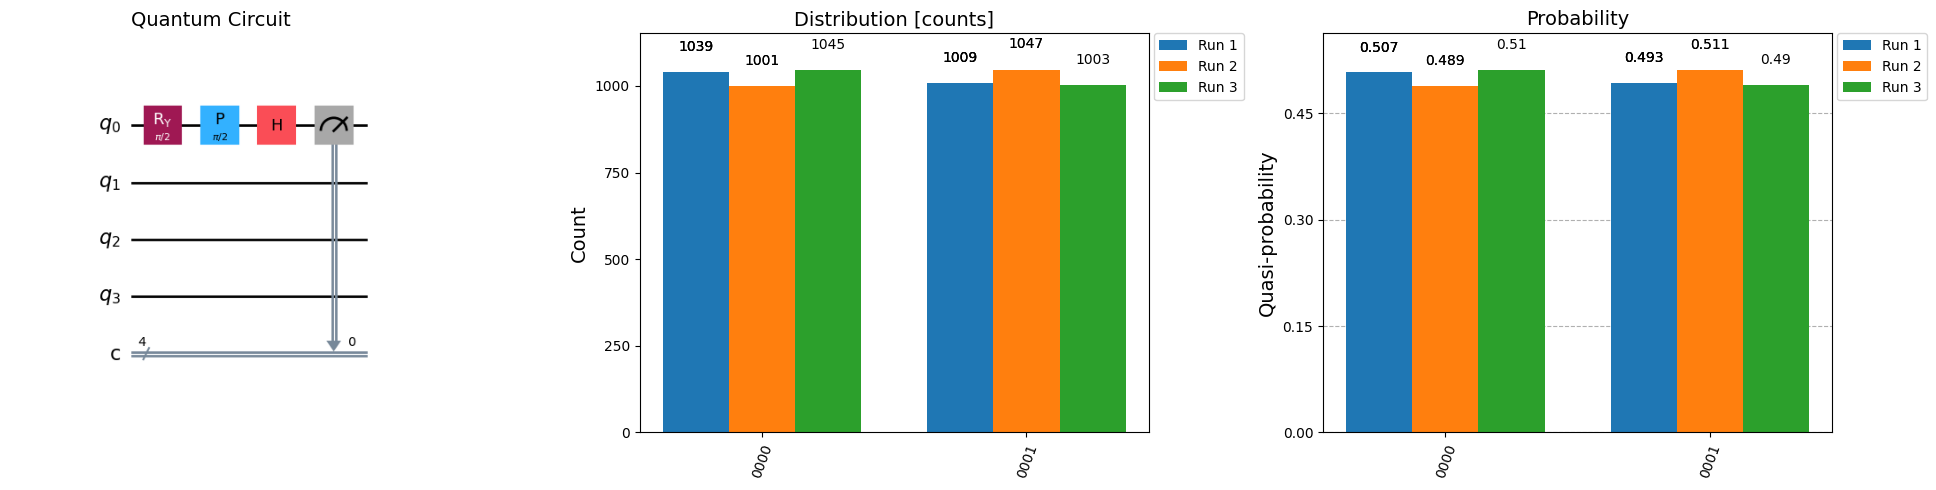

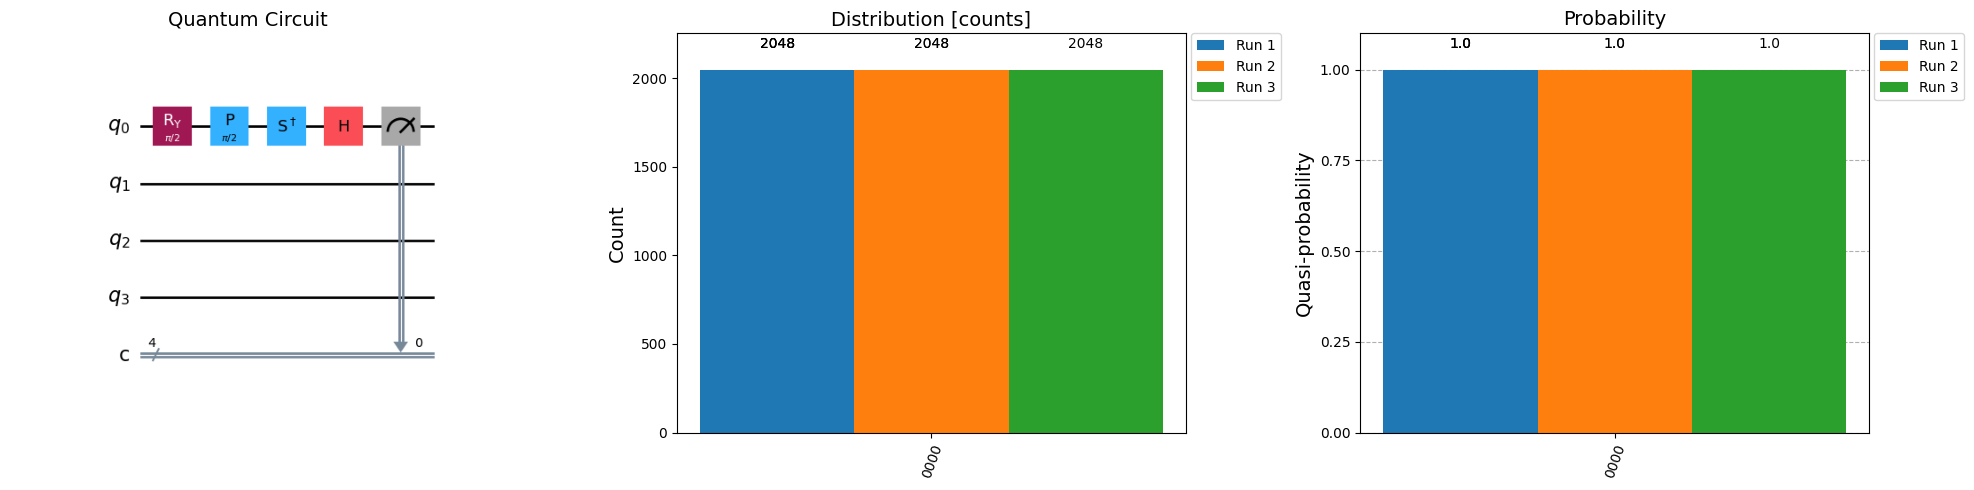

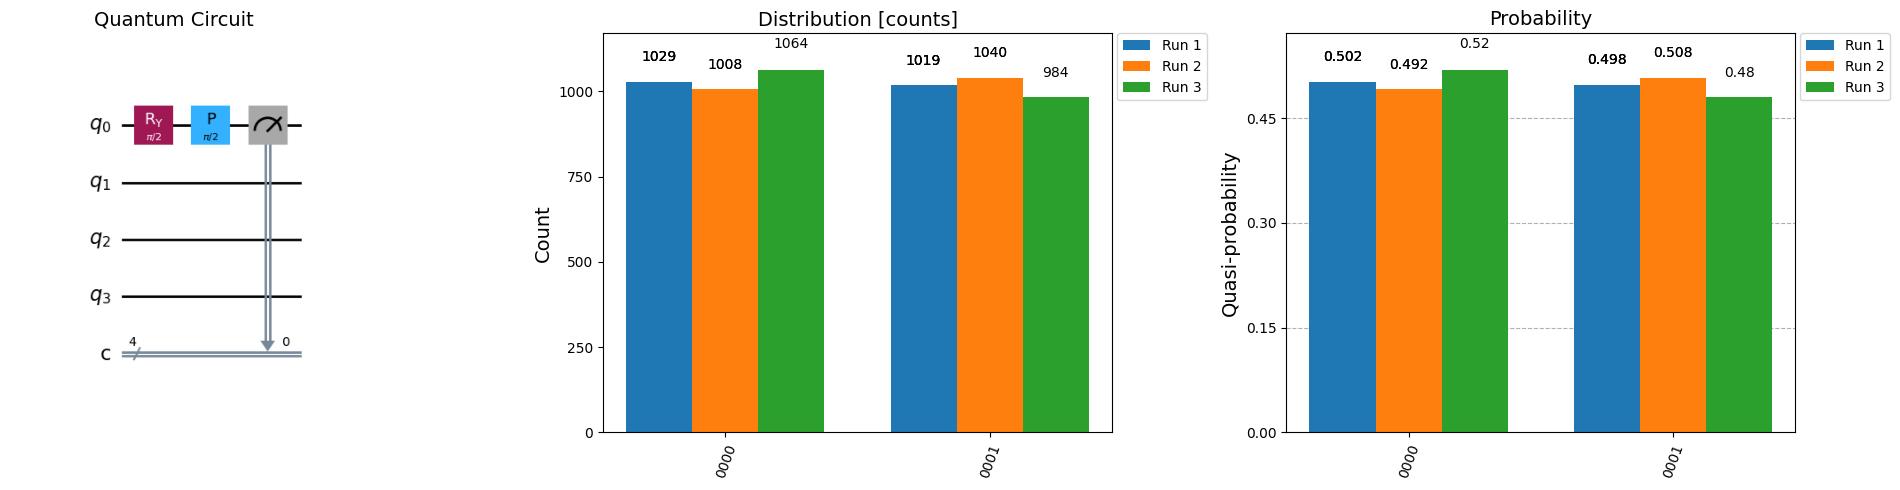

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
from qiskit.visualization import *
from numpy import pi
backend = Aer.get_backend('qasm_simulator')
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit.quantum_info import Statevector
import io
from PIL import Image
import os

os.makedirs("outputs", exist_ok=True)

def plot_results(circuit, shots=2048, runs=3, title=""):
    backend = Aer.get_backend('qasm_simulator')
    tcirc = transpile(circuit, backend)
    
    results = []
    for _ in range(runs):
        r = backend.run(tcirc, shots=shots).result().get_counts()
        results.append(r)
    
    quasi_results = []
    for run_counts in results:
        total = sum(run_counts.values())
        quasi_results.append({k: v / total for k, v in run_counts.items()})
    
    circuit_fig = circuit.draw(output='mpl', style={'name': 'iqx'})
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    buf = io.BytesIO()
    circuit_fig.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    axes[0].imshow(img)
    axes[0].axis('off')
    axes[0].set_title("Quantum Circuit", fontsize=14)
    
    run_labels = [f"Run {i+1}" for i in range(runs)]

    plot_histogram(results, ax=axes[1], legend=run_labels)
    axes[1].set_title("Distribution [counts]", fontsize=14)
    
    plot_histogram(quasi_results, ax=axes[2], legend=run_labels)
    axes[2].set_title("Probability", fontsize=14)
    
    plt.tight_layout()
    fig.savefig(f"outputs/{title}_results.png")
    plt.show()

# -------- TASK 1: Basic measurement --------

n=4 # determining the number of quantum and classical registers
seria=2048 # number of trials in a series of measurements of a given type
# Example of measuring the state of qubit q[0]
nx = n # Number of qubits and bits
qx = QuantumRegister(nx) #
cx = ClassicalRegister(nx) #
circuit = QuantumCircuit(qx, cx) # Quantum algorithm - quantum circuit
circuit.measure(qx[0], cx[0]) # Checking the states of qubits - quantum measurement

plot_results(circuit, title="task1_basic_measurement")

# -------- TASK 2: X gate measurement --------

qreg = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg, creg_c)

circuit.x(qreg[0])
circuit.measure(qreg[0], creg_c[0])

plot_results(circuit, title="task2_x_gate")

# -------- TASK 3: H gate measurement --------

qreg = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg, creg_c)

circuit.h(qreg[0])
circuit.measure(qreg[0], creg_c[0])

plot_results(circuit, title="task3_h_gate")

# -------- TASK 4: Measurements in different bases --------

# Measurement in the X base
qreg = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg, creg_c)

circuit.ry(pi / 2, qreg[0])
circuit.p(pi / 2, qreg[0])
circuit.h(qreg[0])
circuit.measure(qreg[0], creg_c[0])

plot_results(circuit, title="task4_x_basis")

# Measurement in the Y base
qreg = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg, creg_c)

circuit.ry(pi / 2, qreg[0])
circuit.p(pi / 2, qreg[0])
circuit.sdg(qreg[0])
circuit.h(qreg[0])
circuit.measure(qreg[0], creg_c[0])

plot_results(circuit, title="task4_y_basis")

# Measurement in the Z base
qreg = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg, creg_c)

circuit.ry(pi / 2, qreg[0])
circuit.p(pi / 2, qreg[0])
circuit.measure(qreg[0], creg_c[0])

plot_results(circuit, title="task4_z_basis")